In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In this project, I'll use the Zomato API. Since Zomato allows us to get up to 100 restaurants with the maximum 20 restaurnts　per fetch, we will read several json files and combine them to one dataframe. All restaurants are in Chicago area.

In [2]:
df0 = pd.read_json("file0.json", lines=True)
df20 = pd.read_json("file20.json", lines=True)
df40 = pd.read_json("file40.json", lines=True)
df60 = pd.read_json("file60.json", lines=True)
df80 = pd.read_json("file80.json", lines=True)

In [3]:
#concat all the json files
frames = [df0, df20, df40, df60, df80]
df = pd.concat(frames, axis=0, ignore_index=True)

In [4]:
df.head()

,results_found,results_start,results_shown,restaurants
0,19474,0,20,[{'restaurant': {'R': {'has_menu_status': {'de...
1,19474,20,20,[{'restaurant': {'R': {'has_menu_status': {'de...
2,19474,40,20,[{'restaurant': {'R': {'has_menu_status': {'de...
3,19474,60,20,[{'restaurant': {'R': {'has_menu_status': {'de...
4,19474,80,20,[{'restaurant': {'R': {'has_menu_status': {'de...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
results_found    5 non-null int64
results_start    5 non-null int64
results_shown    5 non-null int64
restaurants      5 non-null object
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [6]:
df.restaurants[0]

[{'restaurant': {'R': {'has_menu_status': {'delivery': -1, 'takeaway': -1},
    'res_id': 16737455},
   'apikey': 'd9fd16b5f1a2bf1d8e26fab89b6c3388',
   'id': '16737455',
   'name': "Portillo's Hot Dogs",
   'url': 'https://www.zomato.com/chicago/portillos-hot-dogs-river-north?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
   'location': {'address': '100 West. Ontario 60610',
    'locality': 'River North',
    'city': 'Chicago',
    'city_id': 292,
    'latitude': '41.8934295000',
    'longitude': '-87.6314147000',
    'zipcode': '60610',
    'country_id': 216,
    'locality_verbose': 'River North, Chicago'},
   'switch_to_order_menu': 0,
   'cuisines': 'American, Italian, Burger, Sandwich',
   'timings': '10 AM to 1 AM (Mon-Sat), 10 AM to 12 Midnight (Sun)',
   'average_cost_for_two': 30,
   'price_range': 2,
   'currency': '$',
   'highlights': ['Serves Alcohol',
    'Cash',
    'Debit Card',
    'Takeaway Available',
    'Lunch',
    'Credit Card',
    'Dinner',
    'I

We only need "restaurants". We need to normalize the file.

In [7]:
restaurant_df=pd.DataFrame()

for i in range(5):
    restaurant_df =restaurant_df.append(json_normalize(df.restaurants[i]))

In [28]:
pd.set_option('display.max_columns', None)
restaurant_df.head(100)

,restaurant.R.has_menu_status.delivery,restaurant.R.has_menu_status.takeaway,restaurant.R.res_id,restaurant.apikey,restaurant.id,restaurant.name,restaurant.url,restaurant.location.address,restaurant.location.locality,restaurant.location.city,restaurant.location.city_id,restaurant.location.latitude,restaurant.location.longitude,restaurant.location.zipcode,restaurant.location.country_id,restaurant.location.locality_verbose,restaurant.switch_to_order_menu,restaurant.cuisines,restaurant.timings,restaurant.average_cost_for_two,restaurant.price_range,restaurant.currency,restaurant.highlights,restaurant.offers,restaurant.opentable_support,restaurant.is_zomato_book_res,restaurant.mezzo_provider,restaurant.is_book_form_web_view,restaurant.book_form_web_view_url,restaurant.book_again_url,restaurant.thumb,restaurant.user_rating.aggregate_rating,restaurant.user_rating.rating_text,restaurant.user_rating.rating_color,restaurant.user_rating.rating_obj.title.text,restaurant.user_rating.rating_obj.bg_color.type,restaurant.user_rating.rating_obj.bg_color.tint,restaurant.user_rating.votes,restaurant.all_reviews_count,restaurant.photos_url,restaurant.photo_count,restaurant.photos,restaurant.menu_url,restaurant.featured_image,restaurant.has_online_delivery,restaurant.is_delivering_now,restaurant.store_type,restaurant.include_bogo_offers,restaurant.deeplink,restaurant.is_table_reservation_supported,restaurant.has_table_booking,restaurant.events_url,restaurant.phone_numbers,restaurant.all_reviews.reviews,restaurant.establishment,restaurant.establishment_types
0,-1,-1,16737455,d9fd16b5f1a2bf1d8e26fab89b6c3388,16737455,Portillo's Hot Dogs,https://www.zomato.com/chicago/portillos-hot-d...,100 West. Ontario 60610,River North,Chicago,292,41.8934295000,-87.6314147000,60610,216,"River North, Chicago",0,"American, Italian, Burger, Sandwich","10 AM to 1 AM (Mon-Sat), 10 AM to 12 Midnight ...",30,2,$,"[Serves Alcohol, Cash, Debit Card, Takeaway Av...",[],0,0,OTHER,0,,,https://b.zmtcdn.com/data/res_imagery/16737455...,4.9,Excellent,3F7E00,4.9,lime,800,1013,180,https://www.zomato.com/chicago/portillos-hot-d...,3310,"[{'photo': {'id': 'u_1Mzg4NTkyNDUxN', 'url': '...",https://www.zomato.com/chicago/portillos-hot-d...,https://b.zmtcdn.com/data/res_imagery/16737455...,0,0,,True,zomato://restaurant/16737455,0,0,https://www.zomato.com/chicago/portillos-hot-d...,"(312) 587-8910, (312) 587-8910","[{'review': []}, {'review': []}, {'review': []...",[Fast Food],[]
1,-1,-1,16752778,d9fd16b5f1a2bf1d8e26fab89b6c3388,16752778,The Purple Pig,https://www.zomato.com/chicago/the-purple-pig-...,"500 N Michigan Avenue, Chicago 60611",Magnificent Mile,Chicago,292,41.8911277778,-87.6248472222,60611,216,"Magnificent Mile, Chicago",0,"Mediterranean, Tapas","11:30 AM to 12 Midnight (Mon, Tue, Wed, Thu, S...",110,4,$,"[Takeaway Available, Lunch, Credit Card, Dinne...",[],0,0,OTHER,0,,,https://b.zmtcdn.com/data/res_imagery/16752778...,4.9,Excellent,3F7E00,4.9,lime,800,966,235,https://www.zomato.com/chicago/the-purple-pig-...,912,"[{'photo': {'id': 'u_zMjMzMzc1NjExM', 'url': '...",https://www.zomato.com/chicago/the-purple-pig-...,https://b.zmtcdn.com/data/res_imagery/16752778...,0,0,,True,zomato://restaurant/16752778,0,0,https://www.zomato.com/chicago/the-purple-pig-...,(312) 464-1744,"[{'review': []}, {'review': []}, {'review': []...",[Casual Dining],[]
2,-1,-1,16751896,d9fd16b5f1a2bf1d8e26fab89b6c3388,16751896,Frontera Grill,https://www.zomato.com/chicago/frontera-grill-...,445 North Clark Street 60654,River North,Chicago,292,41.8904333333,-87.6311333333,60654,216,"River North, Chicago",0,Mexican,"Closed (Mon, Sun), 11:30 AM to 2:30 PM, 5:30 P...",80,4,$,"[Credit Card, Takeaway Available, Lunch, Serve...",[],0,0,OTHER,0,,,https://b.zmtcdn.com/data/res_imagery/16751896...,4.6,Excellent,3F7E00,4.6,lime,800,798,136,https://www.zomato.com/chicago/frontera-grill-...,1316,"[{'photo': {'id': 'u_NjAxNzU2OTYwMD', 'url': '...",https://www.zomato.com/chicago/frontera-grill-...,https://b.zmtcdn.com/

Now we completed making a proper dataframe. Let's check what's inside.

In [9]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Data columns (total 56 columns):
restaurant.R.has_menu_status.delivery              100 non-null int64
restaurant.R.has_menu_status.takeaway              100 non-null int64
restaurant.R.res_id                                100 non-null int64
restaurant.apikey                                  100 non-null object
restaurant.id                                      100 non-null object
restaurant.name                                    100 non-null object
restaurant.url                                     100 non-null object
restaurant.location.address                        100 non-null object
restaurant.location.locality                       100 non-null object
restaurant.location.city                           100 non-null object
restaurant.location.city_id                        100 non-null int64
restaurant.location.latitude                       100 non-null object
restaurant.location.longitude                   

There is no null value. We will remove unnecessary columns such as photos, url, phone numbers.

In [128]:
new_df=restaurant_df.drop(columns=["restaurant.apikey",
                                   "restaurant.url",
                                   "restaurant.is_zomato_book_res",
                                   "restaurant.book_form_web_view_url",
                                   "restaurant.R.res_id",
                                   "restaurant.location.city_id",
                                   "restaurant.location.city",
                                   "restaurant.photos_url", 
                                   "restaurant.photo_count",
                                   "restaurant.currency",
                                   "restaurant.photos",
                                   "restaurant.book_again_url",
                                   "restaurant.mezzo_provider",
                                   "restaurant.menu_url",
                                   "restaurant.events_url", 
                                   "restaurant.offers",
                                   "restaurant.opentable_support",
                                   "restaurant.phone_numbers",
                                   "restaurant.user_rating.rating_color",
                                   "restaurant.user_rating.rating_obj.bg_color.type",
                                   "restaurant.user_rating.rating_obj.bg_color.tint",
                                   "restaurant.deeplink",
                                   "restaurant.establishment_types",
                                   "restaurant.switch_to_order_menu",
                                   "restaurant.is_book_form_web_view",
                                   "restaurant.user_rating.rating_obj.title.text",
                                   "restaurant.featured_image",
                                   "restaurant.has_online_delivery",
                                   "restaurant.is_delivering_now",
                                   "restaurant.is_table_reservation_supported",
                                   "restaurant.is_delivering_now",
                                   "restaurant.thumb",
                                   "restaurant.store_type",
                                   "restaurant.has_table_booking",
                                   "restaurant.location.country_id",
                                   "restaurant.R.has_menu_status.takeaway",
                                   "restaurant.R.has_menu_status.delivery",
                                   "restaurant.include_bogo_offers",
                                   "restaurant.all_reviews.reviews"])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Data columns (total 18 columns):
restaurant.id                              100 non-null object
restaurant.name                            100 non-null object
restaurant.location.address                100 non-null object
restaurant.location.locality               100 non-null object
restaurant.location.latitude               100 non-null object
restaurant.location.longitude              100 non-null object
restaurant.location.zipcode                100 non-null object
restaurant.location.locality_verbose       100 non-null object
restaurant.cuisines                        100 non-null object
restaurant.timings                         100 non-null object
restaurant.average_cost_for_two            100 non-null int64
restaurant.price_range                     100 non-null int64
restaurant.highlights                      100 non-null object
restaurant.user_rating.aggregate_rating    100 non-null object
restaurant.user_

In [131]:
new_df.head(10)
new_df["restaurant.establishment"].unique

<bound method Series.unique of 0         [Fast Food]
1     [Casual Dining]
2     [Casual Dining]
3     [Casual Dining]
4     [Casual Dining]
           ...       
15    [Casual Dining]
16    [Casual Dining]
17    [Casual Dining]
18              [Bar]
19    [Casual Dining]
Name: restaurant.establishment, Length: 100, dtype: object>

## Basic data analysis

Which area has the most restaurants in Chicago?

Text(0.5, 0, 'Number of restaurants')

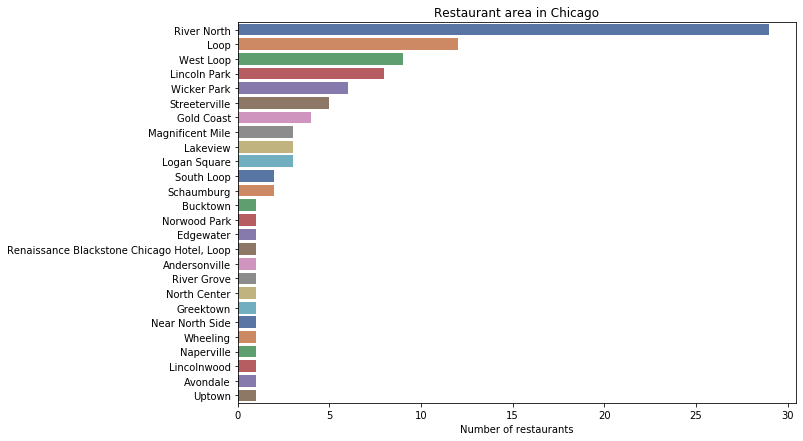

In [79]:
plt.figure(figsize=(10, 7))
areas=new_df["restaurant.location.locality"].value_counts()
sns.barplot(x=areas, y=areas.index, palette="deep")
plt.title("Restaurant area in Chicago")
plt.xlabel("Number of restaurants")

- As you can see River North has the most restaurants. Then Loop, West Loop and Lincoln Park follow.
- I'm living in Chicago and this data makes sense.

Next, let's check what kind of cuisine is popular in Chicago.

Text(0.5, 0, 'Number of restaurants')

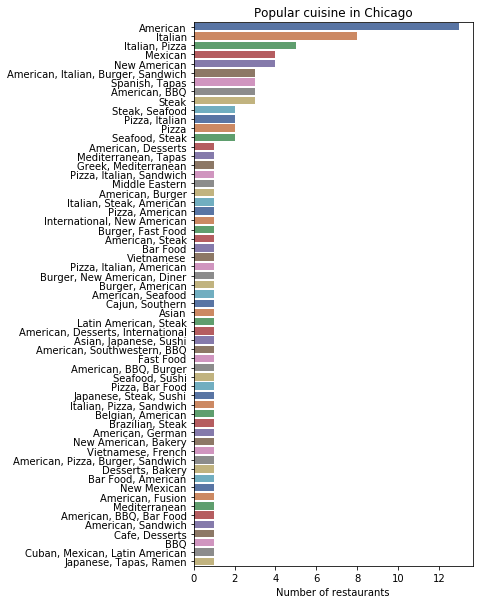

In [80]:
plt.figure(figsize=(5, 10))

cuisines=new_df["restaurant.cuisines"].value_counts()
sns.barplot(x=cuisines, y=cuisines.index, palette="deep")

plt.title("Popular cuisine in Chicago")
plt.xlabel("Number of restaurants")

As you can see, American, Italian, Mexican are popular in Chicago.

In [126]:
plt.figure(figsize=(5, 10))

new_df["restaurant.establishment"]=="Bar"

# establishment=new_df["restaurant.establishment"][0].value_counts()
# establishment
# sns.barplot(x=establishment, y=establishment.index, palette="deep")

# plt.title("Popular cuisine in Chicago")
# plt.xlabel("Number of restaurants")

0     True
1     True
2     True
3     True
4     True
      ... 
15    True
16    True
17    True
18    True
19    True
Name: restaurant.establishment, Length: 100, dtype: bool

<Figure size 360x720 with 0 Axes>

(array([ 2.,  1., 23., 13., 15., 14., 10.,  4.,  7.,  4.,  4.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.,
        132., 144., 156., 168., 180., 192., 204., 216., 228., 240., 252.,
        264., 276., 288., 300., 312., 324., 336., 348., 360., 372., 384.,
        396., 408., 420., 432., 444., 456., 468., 480., 492., 504., 516.,
        528., 540., 552., 564., 576., 588., 600.]),
 <a list of 50 Patch objects>)

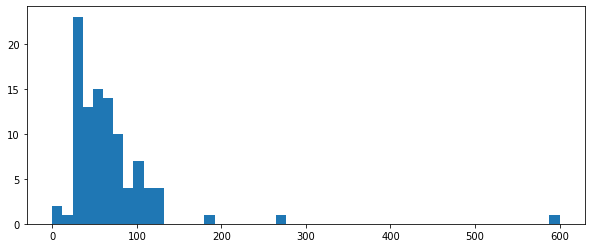

In [99]:
plt.figure(figsize=(10, 4))
costs=new_df["restaurant.average_cost_for_two"]
plt.hist(costs, bins=50)

(array([ 3.,  0.,  0., 30.,  0.,  0., 35.,  0.,  0., 32.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

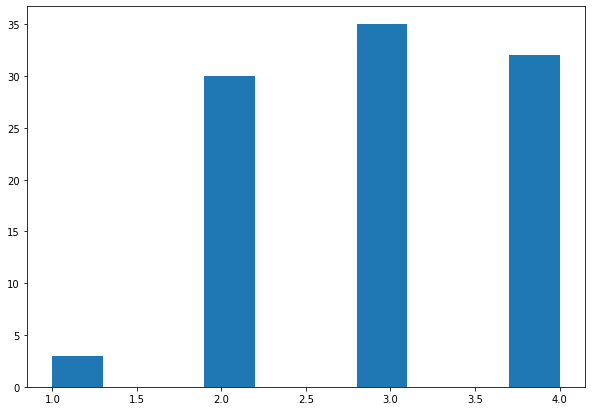

In [104]:
plt.figure(figsize=(10, 7))
costs=new_df["restaurant.price_range"]
plt.hist(costs)

(array([ 9., 15.,  6., 18.,  9.,  9., 11., 11.,  8.,  4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

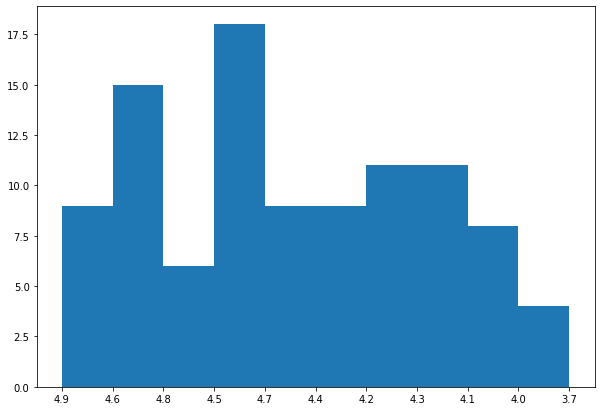

In [91]:
plt.figure(figsize=(10, 7))
ratings=new_df["restaurant.user_rating.aggregate_rating"]
plt.hist(ratings)

In [ ]:
# Since our dataset dosen't have enough data, let's make the aggregate_rating binary >4.7 = 0, 4.7 =< = 1 